In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import os
import matplotlib.pyplot as plt

In [2]:
cwd = os.path.abspath(os.curdir)
filename = cwd + '//hw2_data.txt'
original_data = pd.read_csv(filename, sep="\t", engine='python')
data = original_data._get_numeric_data()
original_data.head()
# data.reindex(np.arange(data.shape[0]))

,listener,artist_name,album_name,song_name,artist_popularity,album_popularity,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1,64,P!nk,Walk Me Home,Walk Me Home,88,77,86,0.0519,0.652,0.453,0.000000,0.1790,-6.119,0.0445,88.038,0.432
2,62,Belinda Carlisle,Greatest Vol.1 - Belinda Carlisle,Heaven Is a Place on Earth,65,64,71,0.0243,0.640,0.852,0.000002,0.0497,-8.119,0.0345,122.902,0.793
3,61,Travis,The Man Who,Why Does It Always Rain On Me?,63,49,57,0.0790,0.497,0.537,0.000139,0.0782,-9.264,0.0269,108.448,0.371
4,51,Freya Ridings,Castles,Castles,69,51,60,0.0046,0.672,0.752,0.000470,0.0560,-4.866,0.0843,116.945,0.429
5,53,Stephen Puth,Sexual Vibe,Sexual Vibe,56,54,63,0.0191,0.803,0.782,0.000005,0.1080,-3.873,0.0289,115.028,0.785


Statistics

In [3]:
stats = data.agg(["mean", "std", "median", "kurt", "skew"]).transpose().round(3) 

display(stats)

print("\n")

print(stats.to_latex())

,mean,std,median,kurt,skew
listener,38.244,17.424,34.000,-0.851,0.596
artist_popularity,65.707,15.948,68.000,2.169,-1.250
album_popularity,52.016,18.768,56.000,0.860,-1.075
song_popularity,51.882,20.406,57.000,0.131,-0.890
acousticness,0.197,0.239,0.091,1.173,1.424
danceability,0.588,0.144,0.594,-0.119,-0.210
energy,0.680,0.191,0.714,-0.139,-0.677
instrumentalness,0.040,0.147,0.000,19.346,4.401
liveness,0.176,0.147,0.120,8.459,2.556
loudness,-7.346,3.113,-6.711,4.027,-1.358




\begin{tabular}{lrrrrr}
\toprule
{} &     mean &     std &   median &    kurt &   skew \\
\midrule
listener          &   38.244 &  17.424 &   34.000 &  -0.851 &  0.596 \\
artist\_popularity &   65.707 &  15.948 &   68.000 &   2.169 & -1.250 \\
album\_popularity  &   52.016 &  18.768 &   56.000 &   0.860 & -1.075 \\
song\_popularity   &   51.882 &  20.406 &   57.000 &   0.131 & -0.890 \\
acousticness      &    0.197 &   0.239 &    0.091 &   1.173 &  1.424 \\
danceability      &    0.588 &   0.144 &    0.594 &  -0.119 & -0.210 \\
energy            &    0.680 &   0.191 &    0.714 &  -0.139 & -0.677 \\
instrumentalness  &    0.040 &   0.147 &    0.000 &  19.346 &  4.401 \\
liveness          &    0.176 &   0.147 &    0.120 &   8.459 &  2.556 \\
loudness          &   -7.346 &   3.113 &   -6.711 &   4.027 & -1.358 \\
speechiness       &    0.052 &   0.043 &    0.038 &  24.089 &  4.299 \\
tempo             &  120.253 &  27.099 &  117.959 &   0.067 &  0.610 \\
valence           &    0.560 &  

In [4]:
y = data.iloc[:,0:1] 
X = data.iloc[:,1:14] 

y = y.values
y = y.flatten()
X = X.values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1,
                                                    stratify = None)


KNN_classifier = KNeighborsClassifier(n_neighbors = 5,
                                      weights = 'uniform',
                                      algorithm = 'kd_tree',
                                      leaf_size = 30,
                                      p = 2,
                                      metric = 'minkowski',
                                      metric_params = None,
                                      n_jobs = 1)

KNN_regressor = KNeighborsRegressor(n_neighbors = 5,
                                      weights = 'uniform',
                                      algorithm = 'kd_tree',
                                      leaf_size = 30,
                                      p = 2,
                                      metric = 'minkowski',
                                      metric_params = None,
                                      n_jobs = 1)

In [5]:
# Holdout
KNN_classifier.fit(X_train, y_train)
KNN_regressor.fit(X_train, y_train)

KNNc_y_pred = KNN_classifier.predict(X_test)
KNNr_y_pred = KNN_regressor.predict(X_test)

In [6]:
print("Classifier \n")
KNNc_y_pred_hit_rate = np.mean(y_test == np.round(KNNc_y_pred))
KNNc_y_pred_rmse = ((((y_test - KNNc_y_pred)**2).mean())**0.5)
KNNc_y_pred__mae = np.absolute(y_test - KNNc_y_pred).mean()

print("Holdout prediction hit rate:", KNNc_y_pred_hit_rate)
print("Holdout prediction RMSE:", KNNc_y_pred_rmse)
print("Holdout prediction MAE:", KNNc_y_pred__mae)

print("\nRegressor \n")
KNNr_y_pred_rmse = ((((y_test - KNNr_y_pred)**2).mean())**0.5)
KNNr_y_pred__mae = np.absolute(y_test - KNNr_y_pred).mean()

print("Holdout prediction RMSE:", KNNr_y_pred_rmse)
print("Holdout prediction MAE:", KNNr_y_pred__mae)

Classifier 

Holdout prediction hit rate: 0.03146067415730337
Holdout prediction RMSE: 23.447814397081874
Holdout prediction MAE: 17.660674157303372

Regressor 

Holdout prediction RMSE: 18.12345181299571
Holdout prediction MAE: 15.277303370786516


In [32]:
#Repeated holdout
rng = np.random.RandomState(seed = 12345)
seeds = np.arange(10*15);
rng.shuffle(seeds);
seeds = seeds[:50]

accuracies_hit = []
accuracies_rmse = []
accuracies_mae = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = i,
                                                        stratify = None)
    KNN_classifier.fit(X_train, y_train)
    KNN_y_pred_i__hit = KNN_classifier.score(X_test, y_test)
    KNN_y_pred2 = KNN_classifier.predict(X_test)
    KNN_y_pred_i__rmse = (((y_test - KNN_y_pred2)**2).mean())**0.5
    KNN_y_pred_i__mae = np.absolute(y_test - KNN_y_pred2).mean()
    
    accuracies_hit.append(KNN_y_pred_i__hit)
    accuracies_rmse.append(KNN_y_pred_i__rmse)
    accuracies_mae.append(KNN_y_pred_i__mae)

accuracies_hit = np.asarray(accuracies_hit)
accuracies_rmse = np.asarray(accuracies_rmse)
accuracies_mae = np.asarray(accuracies_mae)

print("Repeated holdout average hit rate:", accuracies_hit.mean())
print("Repeated holdout average RMSE:", accuracies_rmse.mean())
print("Repeated holdout average MAE:", accuracies_mae.mean())

KNN_classifier.fit(X,y)
print ("Resubstitution optimistic prediction accuracy:", KNN_classifier.score(X,y))    



Repeated holdout average hit rate: 0.03343820224719101
Repeated holdout average RMSE: 24.556464373444722
Repeated holdout average MAE: 18.59092134831461
Resubstitution optimistic prediction accuracy: 0.24814565070802427


In [34]:
params = range(1,21)
cv_acc_rmse, cv_acc_mae, cv_std_rmse, cv_std_mae, cv_stderr_rmse, cv_stderr_mae = [], [], [], [], [], []
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1,
                                                    stratify = None)
#cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
for c in params:
    KNN_classifier = KNeighborsClassifier(n_neighbors = c,
                                          weights = 'uniform',
                                          algorithm = 'kd_tree',
                                          leaf_size = 30,
                                          p = 2,
                                          metric = 'minkowski',
                                          metric_params = None,
                                          n_jobs = 1)
    all_acc_rmse, all_acc_mae = [], []
    for train_index, valid_index in cv.split(X_train, y_train):
        pred = KNN_classifier.fit(X_train[train_index], y_train[train_index])\
               .predict(X_train[valid_index])
        acc_rmse = (((y_train[valid_index] - pred)**2).mean())**0.5
        acc_mae =(np.absolute(y_train[valid_index] - pred)).mean()
        
        all_acc_rmse.append(acc_rmse)
        all_acc_mae.append(acc_mae)
        
    all_acc_rmse = np.array(all_acc_rmse)
    all_acc_mae = np.array(all_acc_mae)
    
    y_pred_cv5_rmse_mean = all_acc_rmse.mean()
    y_pred_cv5_rmse_std = all_acc_rmse.std()
    y_pred_cv5_rmse_stderr = y_pred_cv5_rmse_std / np.sqrt(5)
    y_pred_cv5_mae_mean = all_acc_mae.mean()
    y_pred_cv5_mae_std = all_acc_mae.std()
    y_pred_cv5_mae_stderr = y_pred_cv5_mae_std / np.sqrt(5)  
    
    cv_acc_rmse.append(y_pred_cv5_rmse_stderr)
    cv_stderr_rmse.append(y_pred_cv5_rmse_stderr)
    cv_acc_mae.append(y_pred_cv5_mae_stderr)
    cv_stderr_mae.append(y_pred_cv5_mae_stderr)
    
best_k_rmse = np.argmin(cv_acc_rmse)
best_k_mae = np.argmin(cv_acc_mae)

print('The best K chosen according to the minimum RMSE is:', best_k_rmse+1)   
print('The best K chosen according to the minimum MAE is:', best_k_mae+1) 

KNN_classifier_rmse = KNeighborsClassifier(n_neighbors = params[best_k_rmse],
                                     weights = 'uniform',
                                     algorithm = 'kd_tree',
                                     leaf_size = 30,
                                     p = 2,
                                     metric = 'minkowski',
                                     metric_params = None,
                                     n_jobs = 1)
KNN_classifier_rmse.fit(X_train, y_train)
KNN_rmse_pred_y = KNN_classifier_rmse.fit(X_train, y_train).predict(X_train)
KNN_rmse_pred_rmse = (((KNN_rmse_pred_y-y_train)**2).mean())**0.5
KNN_rmse_pred_mae = np.absolute(KNN_rmse_pred_y-y_train).mean()

print('K-fold prediction RMSE of the best K chose by RMSE is :', KNN_rmse_pred_rmse)
print('K-fold prediction MAE of the best K chose by MAE is :', KNN_rmse_pred_mae)

KNN_classifier_mae = KNeighborsClassifier(n_neighbors = params[best_k_mae],
                                     weights = 'uniform',
                                     algorithm = 'kd_tree',
                                     leaf_size = 30,
                                     p = 2,
                                     metric = 'minkowski',
                                     metric_params = None,
                                     n_jobs = 1)
KNN_classifier_mae.fit(X_train, y_train)
KNN_mae_pred_y = KNN_classifier_mae.fit(X_train, y_train).predict(X_train)
KNN_mae_pred_rmse = (((KNN_mae_pred_y-y_train)**2).mean())**0.5
KNN_mae_pred_mae = np.absolute(KNN_mae_pred_y-y_train).mean()

print('K-fold prediction RMSE of the best K chose by RMSE is :', KNN_mae_pred_rmse)
print('K-fold prediction MAE of the best K chose by MAE is :', KNN_mae_pred_mae)

The best K chosen according to the minimum RMSE is: 20
The best K chosen according to the minimum MAE is: 18
K-fold prediction RMSE of the best K chose by RMSE is : 23.950695984674205
K-fold prediction MAE of the best K chose by MAE is : 17.495183044315993
K-fold prediction RMSE of the best K chose by RMSE is : 23.82605963086886
K-fold prediction MAE of the best K chose by MAE is : 17.26300578034682


In [35]:
cv_acc_rmse = pd.DataFrame(cv_acc_rmse,columns = ['RMSE']) 
cv_acc_mae = pd.DataFrame(cv_acc_mae,columns = ['MAE'])

In [36]:
cv_acc = cv_acc_mae
cv_acc.insert(1,'RMSE',cv_acc_rmse) 
cv_acc.index = range(1,len(cv_acc.index)+1)

<Figure size 432x288 with 0 Axes>

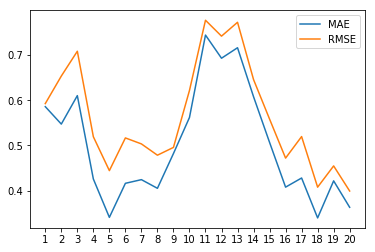

In [39]:
plt.figure()
cv_acc.plot()
plt.xticks(range(1,21))
plt.legend(loc='best')
plt.show()

In [40]:
params = range(1,21)
rng = np.random.RandomState(seed = 12345);seeds = np.arange(10**5)
rng.shuffle(seeds); seeds = seeds[:5]
params_by_seed_rmse, params_by_seed_mae = [], []
for seed in seeds:
    #cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    acc_by_param_rmse, acc_by_param_mae = [], []
    
    for c in params:
        
        KNN_classifier = KNeighborsClassifier(n_neighbors = c, 
                                     weights = 'uniform',
                                     algorithm = 'kd_tree',
                                     leaf_size = 30,
                                     p = 2,
                                     metric = 'minkowski',
                                     metric_params = None,
                                     n_jobs = 1)
        all_acc_rmse = []
        all_acc_mae = []
        
        for train_index, valid_index in cv.split(X_train, y_train):
            
            pred = KNN_classifier.fit(X_train[train_index], y_train[train_index])\
                   .predict(X_train[valid_index])
            acc_rmse =(((pred - y_train[valid_index])**2).mean())**0.5
            acc_mae = (np.absolute(pred - y_train[valid_index])).mean()
            all_acc_rmse.append(acc_rmse)
            all_acc_mae.append(acc_mae)
        
        all_acc_rmse = np.array(all_acc_rmse)
        all_acc_mae = np.array(all_acc_mae)
        
        acc_by_param_rmse.append(all_acc_rmse.mean())
        acc_by_param_mae.append(all_acc_mae.mean())

    params_by_seed_rmse.append(acc_by_param_rmse) 
    params_by_seed_mae.append(acc_by_param_mae)
mean_params_by_seed_rmse = np.mean(params_by_seed_rmse,0)
mean_params_by_seed_mae = np.mean(params_by_seed_mae,0)

best_k_rmse = np.argmin(np.mean(params_by_seed_rmse,0))    
best_k_mae = np.argmin(np.mean(params_by_seed_mae,0))    

print('The best K chosen according to the minimum RMSE is:', best_k_rmse+1)
print('The best K chosen according to the minimum MAE is:', best_k_mae+1)

KNN_classifier_rmse = KNeighborsClassifier(n_neighbors = params[best_k_rmse],
                                     weights = 'uniform',
                                     algorithm = 'kd_tree',
                                     leaf_size = 30,
                                     p = 2,
                                     metric = 'minkowski',
                                     metric_params = None,
                                     n_jobs = 1)
KNN_classifier_rmse.fit(X_train, y_train)
KNN_rmse_pred_y = KNN_classifier_rmse.fit(X_train, y_train).predict(X_train)
KNN_rmse_pred_rmse = (((KNN_rmse_pred_y-y_train)**2).mean())**0.5
KNN_rmse_pred_mae = np.absolute(KNN_rmse_pred_y-y_train).mean()

print('Repeated k-fold prediction RMSE of the best K chose by RMSE is :', KNN_rmse_pred_rmse)
print('Repeated k-fold prediction MAE of the best K chose by MAE is :', KNN_rmse_pred_mae)

KNN_classifier_mae = KNeighborsClassifier(n_neighbors = params[best_k_mae],
                                     weights = 'uniform',
                                     algorithm = 'kd_tree',
                                     leaf_size = 30,
                                     p = 2,
                                     metric = 'minkowski',
                                     metric_params = None,
                                     n_jobs = 1)
KNN_classifier_mae.fit(X_train, y_train)
KNN_mae_pred_y = KNN_classifier_mae.fit(X_train, y_train).predict(X_train)
KNN_mae_pred_rmse = (((KNN_mae_pred_y-y_train)**2).mean())**0.5
KNN_mae_pred_mae = np.absolute(KNN_mae_pred_y-y_train).mean()

print('Repeated k-fold prediction RMSE of the best K chose by RMSE is :', KNN_mae_pred_rmse)
print('Repeated k-fold prediction MAE of the best K chose by MAE is :', KNN_mae_pred_mae)

The best K chosen according to the minimum RMSE is: 2
The best K chosen according to the minimum MAE is: 2
Repeated k-fold prediction RMSE of the best K chose by RMSE is : 17.37922818350502
Repeated k-fold prediction MAE of the best K chose by MAE is : 9.621387283236995
Repeated k-fold prediction RMSE of the best K chose by RMSE is : 17.37922818350502
Repeated k-fold prediction MAE of the best K chose by MAE is : 9.621387283236995


In [41]:
mean_repeated_k_fold_rmse = pd.DataFrame(mean_params_by_seed_rmse,columns = ['RMSE']) 
mean_repeated_k_fold_mae = pd.DataFrame(mean_params_by_seed_mae,columns = ['MAE'])

In [42]:
mean_repeated_k_fold = mean_repeated_k_fold_rmse
mean_repeated_k_fold.insert(1,'MAE',mean_repeated_k_fold_mae)
mean_repeated_k_fold.index = range(1,len(mean_repeated_k_fold.index)+1)

<Figure size 432x288 with 0 Axes>

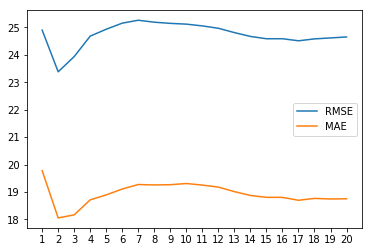

In [43]:
plt.figure()
mean_repeated_k_fold.plot()
plt.xticks(mean_repeated_k_fold.index.values)
plt.legend(loc='best')
plt.show()